📸 Please upload your source image file (e.g., source_image.jpg):


Saving source_image.jpg to source_image (3).jpg


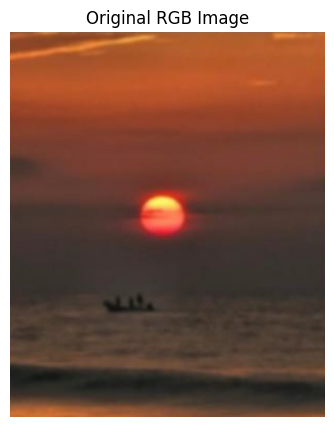

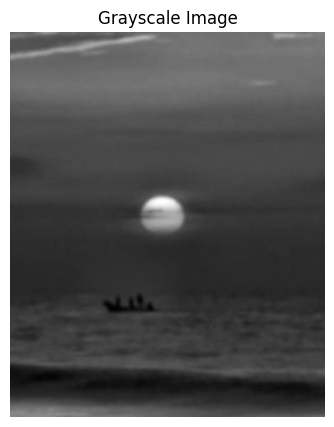

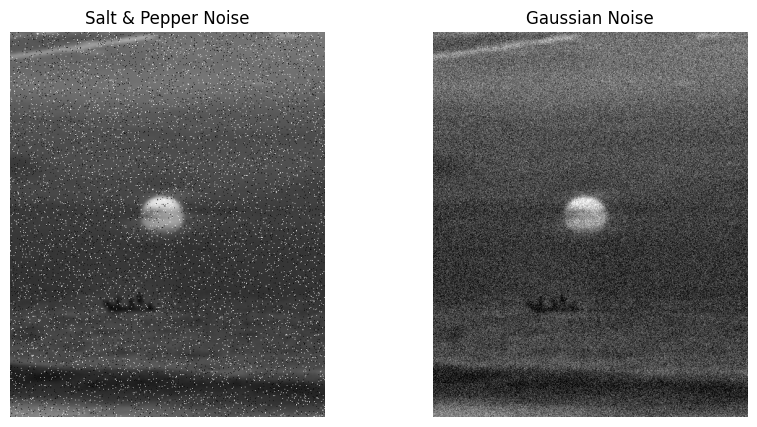

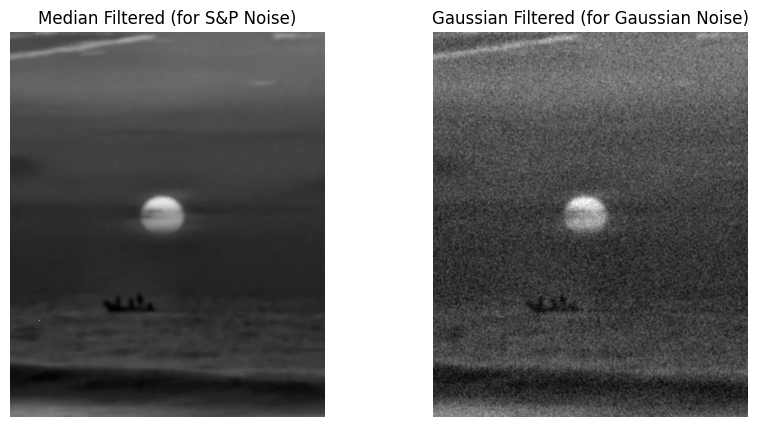

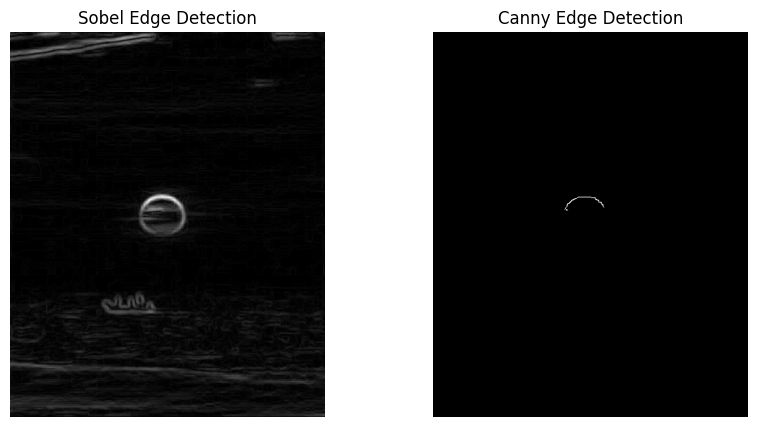

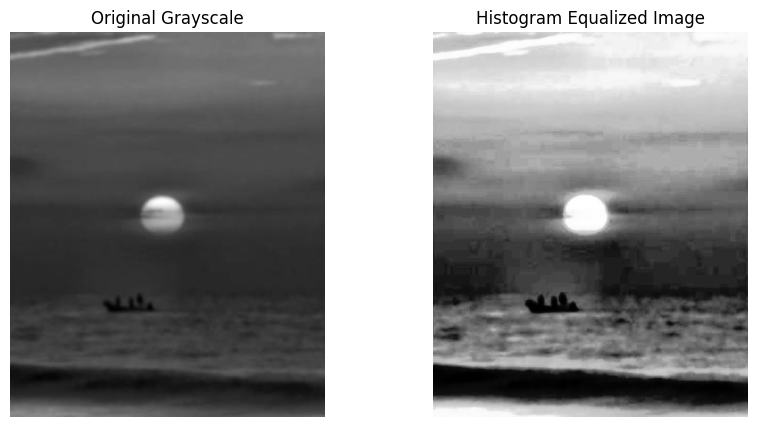


📈 Performance Metrics:
→ PSNR (Median Filter): 50.50 dB
→ SSIM (Median Filter): 0.9964
→ PSNR (Gaussian Filter): 28.56 dB
→ SSIM (Gaussian Filter): 0.4742


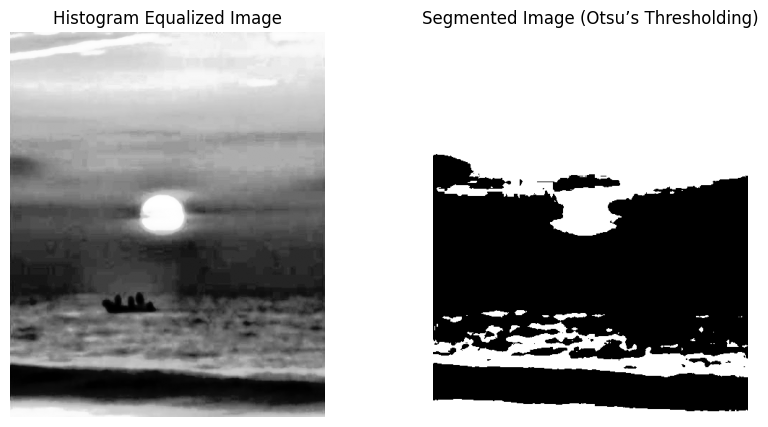


✅ Pipeline Execution Complete! All output images saved in your Colab workspace.


In [ ]:
# ==============================================
# DIGITAL IMAGE PROCESSING PIPELINE
# UCS2523 – IMAGE PROCESSING AND ANALYSIS
# Assignment 1 & 2 (2025–2026)
# ==============================================

# --- Step 0: Setup ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, metrics, filters
from google.colab import files

# --- Step 1: Upload Source Image ---
print("📸 Please upload your source image file (e.g., source_image.jpg):")
uploaded = files.upload()  # Upload any .jpg or .png image
source_image_name = list(uploaded.keys())[0]

# --- Step 2: Read and Display Original Image ---
img = cv2.imread(source_image_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

# --- Step 3: Convert to Grayscale ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# --- Step 4: Add Noise (Salt & Pepper + Gaussian) ---
sp_noisy = util.random_noise(gray, mode='s&p', amount=0.05)
gauss_noisy = util.random_noise(gray, mode='gaussian', var=0.01)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sp_noisy, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gauss_noisy, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")
plt.show()

# --- Step 5: Apply Filters (Median, Gaussian) ---
median_filtered = cv2.medianBlur((sp_noisy*255).astype(np.uint8), 3)
gaussian_filtered = cv2.GaussianBlur((gauss_noisy*255).astype(np.uint8), (3,3), 0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered (for S&P Noise)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered (for Gaussian Noise)")
plt.axis("off")
plt.show()

# --- Step 6: Edge Detection (Sobel, Canny) ---
sobel_edges = filters.sobel(gray)
canny_edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

# --- Step 7: Histogram Equalization ---
equalized = cv2.equalizeHist(gray)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")
plt.show()

# --- Step 8: Performance Metrics (PSNR & SSIM) ---
gray_norm = gray / 255.0
median_norm = median_filtered / 255.0
gaussian_norm = gaussian_filtered / 255.0

# Include data_range=1.0 to avoid ValueError
psnr_median = metrics.peak_signal_noise_ratio(gray_norm, median_norm, data_range=1.0)
psnr_gaussian = metrics.peak_signal_noise_ratio(gray_norm, gaussian_norm, data_range=1.0)
ssim_median = metrics.structural_similarity(gray_norm, median_norm, data_range=1.0)
ssim_gaussian = metrics.structural_similarity(gray_norm, gaussian_norm, data_range=1.0)

print("\n📈 Performance Metrics:")
print(f"→ PSNR (Median Filter): {psnr_median:.2f} dB")
print(f"→ SSIM (Median Filter): {ssim_median:.4f}")
print(f"→ PSNR (Gaussian Filter): {psnr_gaussian:.2f} dB")
print(f"→ SSIM (Gaussian Filter): {ssim_gaussian:.4f}")

# --- Step 9: Segmentation using Otsu's Thresholding ---
_, otsu_segmented = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(otsu_segmented, cmap='gray')
plt.title("Segmented Image (Otsu’s Thresholding)")
plt.axis("off")
plt.show()

# --- Step 10: Save Output Images ---
cv2.imwrite("gray_image.jpg", gray)
cv2.imwrite("median_filtered.jpg", median_filtered)
cv2.imwrite("gaussian_filtered.jpg", gaussian_filtered)
cv2.imwrite("equalized_image.jpg", equalized)
cv2.imwrite("canny_edges.jpg", canny_edges)
cv2.imwrite("sobel_edges.jpg", (sobel_edges * 255).astype(np.uint8))
cv2.imwrite("segmented_image.jpg", otsu_segmented)

print("\n✅ Pipeline Execution Complete! All output images saved in your Colab workspace.")

